# Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :
x˙ 1 = x1(α − βx2)
x˙ 2 = −x2(γ − δx1)
où x1 et x2 désignent le nombre (positif) de proies et de prédateurs respectivement
et α, β, γ, δ sont des paramètres strictement positifs.


# Question 1

$x_1$ représente le nombre de proies, $x_2$ le nombre de prédateurs \
$\alpha$ représente le taux de reproduction des proies \
$\beta$ représente le taux de décès dus aux prédateurs \
$\gamma$ représente la proportion de prédateurs décédant par sélection naturelle \
$\delta$ représente la capacité reproductive des prédateurs grâce aux proies 

Soit $f(x_1, x_2) = (x_1(\alpha - \beta x_2), -x_2(\gamma - \delta x_1))$ \
On appelle point d'équilibre les points $(x_1, x_2)$ tels que $f(x_1, x_2) = 0$ \
On a alors $(0, 0)$ comme point d'équilibre immédiat \
Le 2eme point s'obtient en résolvant 

$\begin{cases}
\alpha - \beta x_2 =0 \\
\gamma - \delta x_1 =0
\end{cases}$ \
On obtient alors $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta}) \in \mathbb{R} _+^* \times \mathbb{R} _+^*$ 
Pour discuter de la stabilité de ces points on écrit la matrice jacobienne de f en tout point $(x_1, x_2)$ \
$J_f(x) = \begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}$

En $x = (0,0)$ on a $J_f(x) = \begin{pmatrix}
\alpha  & 0 \\
0 & -\gamma 
\end{pmatrix}$ \
Les valeurs propres de cette matrice sont  $\alpha > 0$ et $-\gamma < 0$ 
Donc d'après le lien entre stabilité et stabilité du linéarisé tangent, $(0, 0)$ est un point d'équilibre instable.\
En $\bar{x}$ on a $J_f(\bar{x}) = \begin{pmatrix} 
\ 0 & -\beta \gamma /\delta \\
\delta \alpha / \beta & 0
\end{pmatrix}$

On écrit le polynôme caractéristique :
$\chi(J_f(\bar{x}))(\lambda) = \lambda ^2 + \alpha \gamma$ 

Les racines de ce polynôme caractéristique sont à parties réelles nulles donc on ne peut pas conclure avec le lien entre stabilité et stabilité du linéarisé tangent.

# Question 2

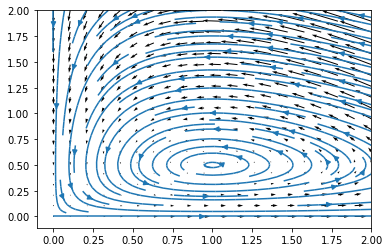

In [2]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.1
beta = 0.2
gamma = 0.1
delta = 0.1
def f(x,y):
    return x*(alpha - beta*y), -y*(gamma - delta * x)
x, y = np.meshgrid(np.linspace(0, 2, 20), np.linspace(0, 2, 20))
dx, dy = f(x, y)
plt.quiver(x, y, dx, dy)
plt.streamplot(x,y,dx,dy)
plt.show()

On peut alors supposer que le point $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ (ici le point $(1.0 , 0.50)$ )est un point stable attractif, alors que le point $(0, 0)$ est instable

 # Question 3

On a vu précédement que $J_f(x) = \begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}$ existe bien et est continue sur tout son ensemble de définition (donc f continuement differentiable par rapport à x).  
On se donne une solution $x(t)$ initialisée en $x_0$ dans $\mathbb{R}_+^*$.  
On suppose par l'absurbe que $x(t) = (x_1(t), x_2(t))$ quitte le cadran $\mathbb{R} _+^* \times \mathbb{R} _+^*$ ,  par exemple $x_1(t)$ devient négatif. Alors par continuité de $x_1$ et par le théorème des valeurs intermediaires :  
il existe   $t_1\in \mathbb{R}$ tel que $x_1(t_1)=0$ et on note alors $x_2(t_1)=a$.  
On se retrouve alors avec le problème de Cauchy suivant :  

$(x_1'(t), x_2'(t)) = f(x_1(t), x_2(t))$   et   $(x_1(t_1), x_2(t_1))=(0, a)$  

Or, le couple de solution $(y_1(t) = 0, y_2(t) = ae^{\gamma t})$ est aussi solution de ce problème de Cauchy.
  
  Or, on a vu que $x_1$ n'était pas identiquement nulle, et donc par le théorème de Cauchy-Lipschitz (ici on utilise l'unicité), il y a contradiction.  
De même, comme $x_1$ et $x_2$ jouent des rôles symetriques, alors $x_2$ ne peut pas changer de signes avant $x_1$.    
Enfin, si $x_1$ et $x_2$ s'annulent en même temps, alors par le théorème de Cauchy-Lipschitz, pour tout $t$, $x_1(t) = 0, x_2(t)=0$, d'ou la contradiction.  

Donc les solutions initialisées dans $\mathbb{R} _+^* \times \mathbb{R} _+^*$ restent dans $\mathbb{R} _+^* \times \mathbb{R} _+^*$ sur leur ensemble de définition.



# Question 4

Calculons la dérivée de H par rapport à t\
$(H \circ x )' = \delta \dot{x_1}  - \gamma \frac {\dot{x_1}}{x_1} + \beta \dot{x_2}  - \alpha \frac {\dot{x_2}}{x_2}$

# Question 5

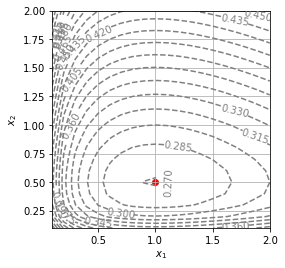

In [3]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
def H(x,y):
    return(delta*x - gamma * np.log(x) + beta*y - alpha*np.log(y))

display_contour(H, np.linspace(0.1,2,20), np.linspace(0.1,2,20), 20)
plt.scatter(np.array([gamma/delta]), np.array([alpha/beta]), color ='red')
plt.show()

$\bar{x}$ se trouve au centre des lignes de niveau concentriques \
On en conclut que ce point d'équilibre est stable. En effet, une solution arbitrairement proche de $\bar{x}$ au départ reste proche de $\bar{x}$ car elle suit les ocurbes de niveau qui ne s'éloignent pas de ce point.

# Question 6

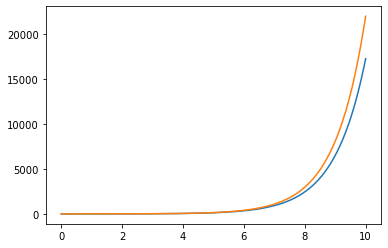

In [40]:
import numpy as np
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        t.append(t[-1] + dt)
        x.append(x[-1] + dt * f(t, x[-1]))
    t,x = np.array(t), np.array(x)
    return t, x

def exp(t,x):
    return x
sol = solve_euler_explicit(exp, np.array([1]), 0.05, 0, 10)
plt.plot(sol[0], sol[1])
plt.plot(sol[0], np.exp(sol[0]))
plt.show()

On peut visualiser l'ordre de convergence en comparant la distance max entre la solution réelle et la solution calculée numeriquement et en la comparant à $\delta t$. \
Ici, la distance maximale est celle que l'on observe aux points d'abscisse 10.

# Question 7 

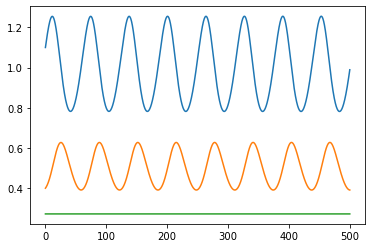

In [18]:
def f(t, X):
    return np.array([X[0]*(alpha - beta*X[1]), -X[1]*(gamma - delta * X[0])])

sol = solve_euler_explicit(f, np.array([1.1 ,0.4]), 0.001, 0, 500)

plt.plot(sol[0], sol[1])
plt.plot(sol[0], H(sol[1][:,0], sol[1][:,1]))
plt.show()

Aux temps longs, on observe (les deux premières courbes) des oscillations des deux populations qui sont de même période mais légerement déphasées. Cela semble en effet fidèle à la réalité car cela représente des populations de chasseurs et de proies, donc quand l'un évolue, l'autre suit son évolution avec un leger retard car cela represente une population qui se fait "moins manger". Les oscillations sont dues au fait que l'on n'est pas parti d'un point d'équilibre.

# Question 8

In [22]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        t.append(t[-1] + dt)
        new_x = x[-1]
        for k in range(itermax):
            new_x = x[-1] + dt*f(t[-1], new_x)
        x.append(new_x)
    t,x = np.array(t), np.array(x)
    return t, x


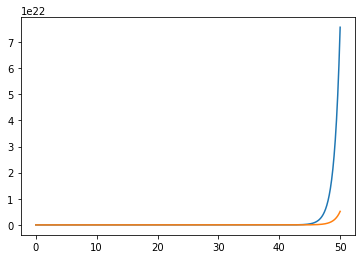

In [36]:
def exp(t,x):
    return x
sol = solve_euler_implicit(exp, np.array([1]), 0.1, 0, 50)
plt.plot(sol[0], sol[1])
plt.plot(sol[0], np.exp(sol[0]))
plt.show()

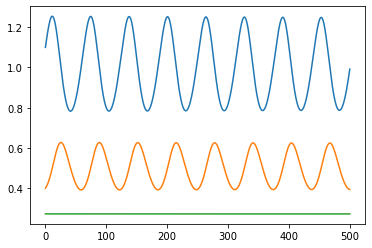

In [42]:
sol = solve_euler_implicit(f, np.array([1.1 ,0.4]), 0.01, 0, 500)

plt.plot(sol[0], sol[1])
plt.plot(sol[0], H(sol[1][:,0], sol[1][:,1]))
plt.show()

# Question 9 

D'après la Question 5, on a $(H \circ x )' = \delta \dot{x_1}  - \gamma \frac {\dot{x_1}}{x_1} + \beta \dot{x_2}  - \alpha \frac {\dot{x_2}}{x_2}$ \
En prenant $x_1$ et $x_2$ solutions des équations de Lotka-Volterra, alors on obtient $(H \circ x)' = 0$, donc $\forall t,  H(x(t)) = H(x(0))$ et $H(x_1, x_2) - H_0 = 0$ \
Les solutions de Lokta-Volterra sont donc solutions du système. Réciproquement, si ce sytème est vrai pour tout u continûement différentiable, on peut choisir la fonction nulle et on a alors $x_1$ et $x_2$ solutions de Lokta-Volterra

# Question 10

D'après la Question 5, on a $(H \circ x )' = \delta \dot{x_1}  - \gamma \frac {\dot{x_1}}{x_1} + \beta \dot{x_2}  - \alpha \frac {\dot{x_2}}{x_2}$ \
En prenant $x_1$ et $x_2$ solutions du système précédent on a $\frac{d }{dt} (H(x(t)) - H_0)=  (H(x(t)) - H_0)*[u_1(x(t))*(\frac{\gamma}{x_1} - \delta) + u_2(x(t))*(\frac{\alpha}{x_2} - \beta)]$

Or $\nabla H(x_1, x_2) = \begin {pmatrix}
\delta - \frac{\gamma}{x_1}  \\
\beta - \frac{\alpha}{x_2} 
\end {pmatrix}$ \
On peut alors choisir $u(x_1,x_2) = k * \nabla H(x_1, x_2)$ \
Alors $\frac{d }{dt} (H(x(t)) - H_0)= - k ||H(x_1, x_2)||^2(H(x(t)) - H_0)$

# Question 11